*House price prediction*

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

# Mounting G Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML/Practical 1/Bengaluru_House_Data.csv")

In [ ]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
data.shape


(13320, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Checking unique values

In [ ]:
for columns in data.columns:
  print(columns)
  print("-"*50)
  print(data[columns].value_counts())
  print("-"*50)

area_type
--------------------------------------------------
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------------------------
availability
--------------------------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------------------------------------
location
--------------------------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st

In [ ]:
data.drop(columns=["society"], inplace=True) 

In [ ]:
data=data.dropna(how='any',axis=0)

In [ ]:
data.shape

(12710, 8)

In [ ]:
data.describe()

,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [ ]:
#splitting size column for integer values due to inconsistant suffixes
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [ ]:
#checking for outliers
data[data.bhk>20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [ ]:
#checking the range of this column
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
#creating a function to deal with the ranges given in some cells in "total_sqft" column
def covt_Range(x):
  temp = x.split('-')
  if len(temp) == 2:
      return (float(temp[0]) + float(temp[1]))/2
  try:
      return float(x)
  except:
      return None  

In [ ]:
#applying "covt_Range" to "total_sqrt" column
data['total_sqft']= data['total_sqft'].apply(covt_Range)

In [ ]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
data.drop(columns=['area_type','availability'],inplace=True)

In [ ]:
data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


<ipython-input-23-ffb437c95745>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

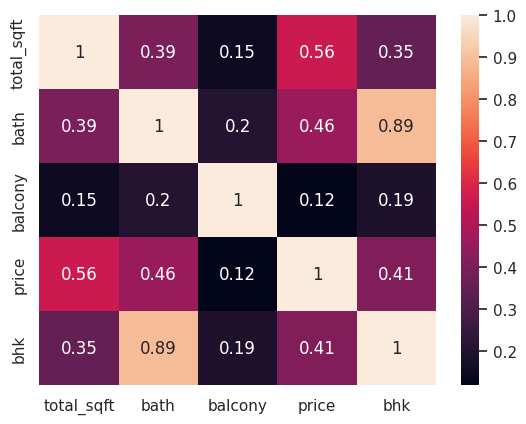

In [ ]:
#plotting correlation

correlation = data.corr()
sb.heatmap(correlation, xticklabels = correlation.columns, annot = True)

In [ ]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [ ]:
data['balcony'].unique()

array([1., 3., 2., 0.])

In [ ]:
data['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [ ]:
#'bath' and 'bhk' columns are highly correlated,we need to drop one of them
data.drop(columns=['bath'], inplace=True)

In [ ]:
data.head()

,location,size,total_sqft,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,1.0,51.00,2


In [ ]:
#finding price per sq.ft
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

In [ ]:
data['price_per_sqft']=data['price_per_sqft'].round(2)
data['price_per_sqft']

0         3699.81
1         4615.38
2         4305.56
3         6245.89
4         4250.00
           ...   
13314     6530.61
13315     6689.83
13317     5258.55
13318    10407.34
13319     3090.91
Name: price_per_sqft, Length: 12710, dtype: float64

In [ ]:
data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12668.000000,12710.000000,12710.000000,12710.000000,1.266800e+04
mean,1511.835167,1.584343,106.060778,2.737136,6.876277e+03
std,1162.097276,0.817287,131.766089,1.205097,2.263354e+04
min,5.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.242720e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.376340e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.142860e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [ ]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()

In [ ]:
location_count

Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1254, dtype: int64

In [ ]:
location_cnt_less_10 = location_count[location_count <= 10]

In [ ]:
location_cnt_less_10

Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: location, Length: 1017, dtype: int64

In [ ]:
data['location']=data['location'].apply(lambda x: 'other'if x in location_cnt_less_10 else x)

In [ ]:
data['location'].value_counts()

other                        2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: location, Length: 238, dtype: int64

In [ ]:
data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12668.000000,12710.000000,12710.000000,12710.000000,1.266800e+04
mean,1511.835167,1.584343,106.060778,2.737136,6.876277e+03
std,1162.097276,0.817287,131.766089,1.205097,2.263354e+04
min,5.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,1.000000,49.030000,2.000000,4.242720e+03
50%,1260.000000,2.000000,70.000000,3.000000,5.376340e+03
75%,1640.000000,2.000000,115.000000,3.000000,7.142860e+03
max,52272.000000,3.000000,2912.000000,43.000000,2.300000e+06


In [ ]:
#Removing outliers from 'total_sqft'column
(data['total_sqft']/data['bhk']).describe()

count    12668.000000
mean       570.060291
std        380.298999
min          0.714286
25%        473.333333
50%        550.000000
75%        622.500000
max      26136.000000
dtype: float64

In [ ]:
data=data[((data['total_sqft']/data['bhk'])>=300)]

In [ ]:
data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12013.000000,12013.000000,12013.000000,12013.000000,12013.000000
mean,1542.315982,1.587613,105.003648,2.607259,6206.082361
std,1181.094228,0.808867,134.205666,0.922985,3985.518849
min,300.000000,0.000000,9.000000,1.000000,267.830000
25%,1107.000000,1.000000,48.450000,2.000000,4199.360000
50%,1285.000000,2.000000,68.000000,2.000000,5252.530000
75%,1660.000000,2.000000,110.000000,3.000000,6823.530000
max,52272.000000,3.000000,2912.000000,13.000000,176470.590000


In [ ]:
data.shape

(12013, 7)

In [ ]:
data.price_per_sqft.describe()

count     12013.000000
mean       6206.082361
std        3985.518849
min         267.830000
25%        4199.360000
50%        5252.530000
75%        6823.530000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [ ]:
#Removing the outlier from "price_per_sqft" column
q = data['price_per_sqft'].quantile(0.99)
data_1=data[data['price_per_sqft']<q]
data_1.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11892.000000,11892.000000,11892.000000,11892.000000,11892.000000
mean,1529.214625,1.586865,98.261674,2.593508,5977.170620
std,1162.286734,0.807795,102.325976,0.907505,2868.665841
min,300.000000,0.000000,9.000000,1.000000,267.830000
25%,1105.000000,1.000000,48.000000,2.000000,4189.640000
50%,1280.000000,2.000000,68.000000,2.000000,5233.565000
75%,1650.000000,2.000000,110.000000,3.000000,6760.560000
max,52272.000000,3.000000,2200.000000,13.000000,20645.160000


In [ ]:
data.bhk.describe()

count    12013.000000
mean         2.607259
std          0.922985
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bhk, dtype: float64

In [ ]:
#Removing outliers or invalid data points from "bhk" column

def bhk_outliers (df):
  exclude_indices = np.array([])  # creating an empty array which will carry all the values we need
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0] #number of unique values
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1) 
      if stats and stats ['count']>5:  #checking for threshold no.of data points to get accyrate mean
          exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index)
  return df.drop(exclude_indices , axis='index')      

data = bhk_outliers(data)
data.shape       

(8320, 7)

In [ ]:
data.head()

,location,size,total_sqft,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,1.0,51.00,2,4250.00


In [ ]:
# Removing column which are not necessary for the model
data.drop(columns=['size', 'price_per_sqft'],inplace=True)

In [ ]:
data.head()

,location,total_sqft,balcony,price,bhk
0,Electronic City Phase II,1056.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,3.0,120.00,4
2,Uttarahalli,1440.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,1.0,95.00,3
4,Kothanur,1200.0,1.0,51.00,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    8320 non-null   object 
 1   total_sqft  8320 non-null   float64
 2   balcony     8320 non-null   float64
 3   price       8320 non-null   float64
 4   bhk         8320 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 390.0+ KB


In [ ]:
data.to_csv("cleaned_data.csv")

In [ ]:
x = data.drop(columns = ['price']) # independant features
y = data['price'] # feature which we are predicting through the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [ ]:
print(x_train.shape)

(6656, 4)


In [ ]:
print(x_test.shape)

(1664, 4)


# Model 1 : Linear Regression

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']), remainder='passthrough')

In [ ]:
scaler = StandardScaler()

In [ ]:
lr = LinearRegression()

In [ ]:
pipe = make_pipeline(column_trans , scaler, lr)

In [ ]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_lr = pipe.predict(x_test)

In [ ]:
r2_score(y_test , y_pred_lr)

0.7059506360205039

# Model 2 : Lasso

In [ ]:
lasso = Lasso()

In [ ]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [ ]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [ ]:
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.7064964807885676

# Model 3 : Ridge

In [ ]:
ridge = Ridge()

In [ ]:
pipe = make_pipeline(column_trans,scaler,ridge)

In [ ]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.7062667131366189